# Deep Learning - Iris 

The Iris flower dataset is used to build the model and perform classification tasks

### Setup

In [1]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.18.1 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.18.1 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.18.1 which is incompatible.


  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-any.whl (2.4 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Created wheel for jax: filename=jax-0.4.10-py3-none-any.whl size=1480617 sha256=3d2e69c0ca9182f98947910de04fe93c887936adb57f8ead6a4ee1a8e48a3176
  Stored in directory: c:\users\amanmsi\appdata\local\pip\cache\wheels\e5\6c\70\7c6be85fa56f05480fe043bd

###  Prepare Input Data for Deep Learning

Preparing test train dataset

In [8]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load Data and review content
iris_data = pd.read_csv("iris.csv")

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())

#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])

#Convert input to numpy array
np_iris = iris_data.to_numpy()

#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Loaded Data :
------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Targe

### Model

In [4]:

from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform 
forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 3s 119ms/step - loss: 0.9265 - accuracy: 0.6389 - val_loss: 0.4976 - val_accuracy: 0.9630
Epoch 2/10
7/7 [==============================] - 0s 18ms/step - loss: 0.6194 - accuracy: 0.8148 - val_loss: 0.3031 - val_accuracy: 0.9630
Epoch 3/10
7/7 [==============================] - 0s 17ms/step - loss: 0.4977 - accuracy: 0.8241 - val_loss: 0.2205 - val_accuracy: 0.9630
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 0.4257 - accuracy: 0.8426 - val_loss: 0.1752 - val_accuracy: 0.9630
Epoch 5/10
7/7 [==============================] - 0s 17ms/step - loss: 0.3738 - accuracy: 0.8519 - val_loss: 0.1446 - val_accuracy: 0.9630
Epoch 6/10
7/7 [==============================] - 0s 17ms/step - loss: 0.3372 - accuracy: 0.8704 - val_loss: 0.1285 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 21ms/step - loss: 0.3078 - accuracy: 0.8981 - val_loss:

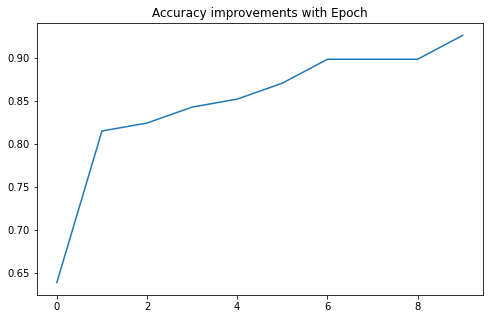


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 71ms/step - loss: 0.3727 - accuracy: 0.9333


[0.37272706627845764, 0.9333333373069763]

In [5]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### Saving and Loading Models


In [6]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Predictions

In [7]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 [==============================] - 0s 140ms/step
Raw Prediction Output (Probabilities) : [[0.03193664 0.6538551  0.3142082 ]]
Prediction is  ['versicolor']
